In [ ]:
#%% Carga de librerías.
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:

#%% Carga del dataframe.
df = pd.read_csv("AMD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-23,9.68,10.06,9.68,9.91,9.91,27905700
1,2017-01-24,9.95,10.49,9.95,10.44,10.44,43991200
2,2017-01-25,10.74,10.98,10.15,10.35,10.35,61778100
3,2017-01-26,10.35,10.66,10.30,10.52,10.52,35866600
4,2017-01-27,10.60,10.73,10.52,10.67,10.67,32719200


In [ ]:
 #%% Se eliminan filas que tengan valor NaN.
 df = df.dropna()
 df = df.reset_index(drop=True)

In [ ]:
#%% Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Date'] # Guardamos la columna Date.
df = df.drop('Date', 1) # Borramos la columna del dataframe.

In [ ]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})
df_escalado.head()

,Close,Volume,2,3,4,5
0,0.003891,0.001875,0.004352,0.002494,0.002494,0.053722
1,0.005642,0.004654,0.006188,0.005972,0.005972,0.104946
2,0.010765,0.007822,0.007548,0.005381,0.005381,0.161588
3,0.008236,0.005753,0.008568,0.006497,0.006497,0.079073
4,0.009857,0.006206,0.010064,0.007481,0.007481,0.069050


In [ ]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

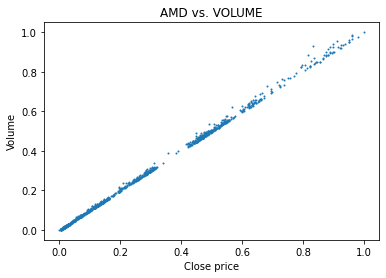

In [ ]:
#%% Representación gráfica de los datos.
x = df_escalado['Close'].values
y = df_escalado['Volume'].values
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('AMD vs. VOLUME')
plt.plot(x,y,'o',markersize=1)

C:\Users\Renzo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


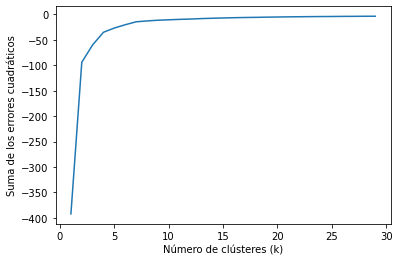

In [ ]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

In [ ]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.51354217 0.51673152 0.52798198 0.51649019 0.51649019 0.12211096]
 [0.1071896  0.10624964 0.10836125 0.10543358 0.10543358 0.26197051]
 [0.84089418 0.85500884 0.8588361  0.84741414 0.84741414 0.16805581]
 [0.02547299 0.02245414 0.025304   0.02281934 0.02281934 0.14392303]
 [0.25988263 0.2617397  0.26563165 0.26064213 0.26064213 0.1734217 ]]


In [ ]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)
df['label'] = labels

In [ ]:
#%% Añadimos la columna de fecha
df.insert(0, 'Date', dates)

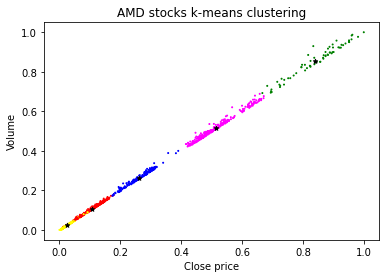

In [ ]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('AMD stocks k-means clustering')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2e251de5-0dc4-4401-98b7-759471e83f8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>